# MSc Big Data & Finance
## Data Visualization Session 3 - Dynamic Viz (Part 1)

Let's begin with importing librairies

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

import plotly.graph_objects as go
import plotly.express as px
from pandas_datareader import data as pdr

Let's load some data

In [11]:
btc=pd.read_csv('BTC-USD.csv')
btc['Date']=pd.to_datetime(btc['Date'], errors='coerce')
btc_full=pd.DataFrame(btc['Close']).set_index(btc['Date'])
btc_full.tail()

,Close
Date,
2020-01-13,8144.194336
2020-01-14,8827.764648
2020-01-15,8807.010742
2020-01-16,8723.786133
2020-01-21,8637.945313


Let's fill the gaps with previous close

In [12]:
btc_full=btc_full.asfreq('D', method='ffill')
btc_full.tail()

,Close
Date,
2020-01-17,8723.786133
2020-01-18,8723.786133
2020-01-19,8723.786133
2020-01-20,8723.786133
2020-01-21,8637.945313


Text(0, 0.5, 'YoY% Change')

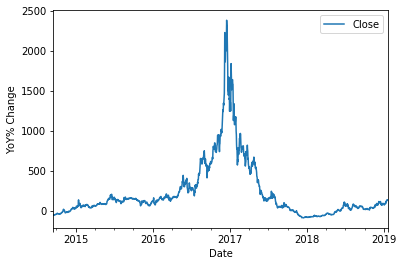

In [15]:
YOY = (btc_full.tshift(-365)/btc_full - 1)*100
YOY.dropna().plot()
plt.ylabel('YoY% Change')

In [20]:
x=YOY.dropna().index.to_pydatetime()
fig=px.line(YOY.dropna(), x=x, y="Close")
fig.show()

In [29]:
fig.update_layout(
    title={
        'text': "Bitcoin Year-on-Year Return",
        'y':0.95,
        'x':0.5,
        'xanchor':'center',
        'yanchor':'top'},
        xaxis_title="Date",
        yaxis_title="% Return",
        font=dict(
        family="Arial",
        size=14,
        color="#7f7f7f")
    )

fig.show()

In [37]:
tickers=['^GSPC','^N225','^FCHI','^SMSI']
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

df=[]

for year in years:
    startdate=dt(year, 1,1)
    enddate=dt(year,12,31)
    df2=pdr.get_data_yahoo(tickers, start=startdate, end=enddate)['Close']
    for ticker in tickers:
        perf=((df2[ticker].dropna().iloc[-1]/df2[ticker].dropna().iloc[0])-1)*100
        df.append({'Country':ticker, 'Year':year,'Performance':perf})

df=pd.DataFrame(df, columns=('Country','Year','Performance'))
df.head()

,Country,Year,Performance
0,^GSPC,2010,11.001865
1,^N225,2010,-3.996983
2,^FCHI,2010,-4.066048
3,^SMSI,2010,-20.487817
4,^GSPC,2011,-1.121972


In [38]:
df.replace(to_replace=['^GSPC','^N225','^FCHI','^SMSI'], value=['USA', 'JPN', 'FRA', 'CHE'], inplace=True)
df.head()

,Country,Year,Performance
0,USA,2010,11.001865
1,JPN,2010,-3.996983
2,FRA,2010,-4.066048
3,CHE,2010,-20.487817
4,USA,2011,-1.121972


In [39]:
fig=px.scatter(df, x="Year", y="Performance", color="Country")
fig.show()

In [41]:
fig=px.scatter(df, x="Year", y="Performance", facet_col="Country", trendline="ols")
fig.show()

In [44]:
fig= px.line(df, x="Year", y="Performance", color="Country", hover_name="Country", line_shape="spline")
fig.show()

In [46]:
fig=px.box(df, x="Country", y="Performance")
fig.show()

In [50]:
fig = px.choropleth(df.query("Year==2019"), locations="Country", color="Performance", hover_name="Country", range_color=[-30,60])
fig.show()

In [51]:
fig = px.choropleth(df, locations="Country", color="Performance", hover_name="Country", animation_frame="Year", range_color=[-30,60])
fig.show()

In [53]:
fig = px.scatter_geo(df, locations="Country", hover_name="Country", size="Performance", range_color=[-30,60], animation_frame="Year")
fig.show()

ValueError: 
    Invalid element(s) received for the 'size' property of scattergeo.marker
        Invalid elements include: [-3.996982724447673, -4.0660483792535835, -20.487817095278494]

    The 'size' property is a number and may be specified as:
      - An int or float in the interval [0, inf]
      - A tuple, list, or one-dimensional numpy array of the above

In [54]:
df["Sign"]=np.sign(df["Performance"])
df["Absolute"]=np.absolute(df["Performance"])
df.head()

,Country,Year,Performance,Sign,Absolute
0,USA,2010,11.001865,1.0,11.001865
1,JPN,2010,-3.996983,-1.0,3.996983
2,FRA,2010,-4.066048,-1.0,4.066048
3,CHE,2010,-20.487817,-1.0,20.487817
4,USA,2011,-1.121972,-1.0,1.121972


In [60]:
fig = px.scatter_geo(df, locations="Country", hover_name="Country", size="Absolute", color="Sign", color_continuous_scale='Bluered_r', animation_frame="Year", projection="orthographic")
fig.show()

In [59]:
fig = px.parallel_categories(df, color="Performance", color_continuous_scale=px.colors.sequential.Cividis)
fig.show()

In [61]:
elections=pd.read_csv("premiertour_v2.csv", sep=";")
elections.head()

,Region,Macron,Le Pen,Fillon,Melanchon,Hamon,Dupont Aignan,Lassalle,Poutou,Asselineau,Arthaud,Cheminade,Blancs,Nuls,Abstention,Inscrits,Exprimés,Premier
0,Ile-de-France,1612516,708026,1249586,1224978,430324,226203,36350,45705,64391,23582,9795,87595,32458,1567775,7199231,5631456,Macron
1,Auvergne-Rhone-Alpes,1025872,867591,845905,805588,256532,215883,53247,43509,41336,24656,7597,78647,30798,1228996,5416712,4187716,Abstention
2,Nouvelle-Aquitaine,851304,640148,602830,703439,240157,155581,91904,49646,26664,21439,6262,63983,30437,940568,4329942,3389374,Abstention
3,Hauts-de-France,630285,1003216,521373,633313,166630,160721,22410,33652,26043,29193,5688,58622,25548,1009363,4241887,3232524,Abstention
4,Occitanie,740031,762087,566036,734193,216349,135403,75482,35216,28603,16776,5524,56860,27267,878594,4194294,3315700,Abstention


In [66]:
fig=px.scatter_ternary(elections, a="Macron", b="Le Pen",c="Abstention", color="Premier", size="Exprimés", hover_name="Region")
fig.show()

In [67]:
ratios= pd.read_csv("ratios.csv", sep=";")
ratios.head()

,ratio,value,ticker
0,profit_margin,0.044240,AAP
1,operating_margin,0.063073,AAP
2,cash_ratio,0.230710,AAP
3,debt_asset,0.545500,AAP
4,profit_margin,0.150154,MSFT


In [69]:
fig=px.line_polar(ratios, r="value", theta="ratio",color="ticker",line_close=True, color_discrete_sequence=px.colors.sequential.Teal)
fig.show()

In [73]:
token=#your token here

villes= pd.read_csv("villes_france.csv", sep=";")

fig=px.scatter_mapbox(villes.dropna(), lat="latitude", lon="longitude", hover_name="nom_commune", color="Population", 
                      size="Population", hover_data=["nom_reg", "Population"],
                     color_continuous_scale=px.colors.sequential.Bluered_r, zoom=3, height=300)
fig.update_layout(mapbox_style="satellite", mapbox_accesstoken=token)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
